In [1]:
import pandas as pd

In [77]:
df = pd.read_csv('RuFoLa.csv')
df

,level,text
0,1,Это мой друг. Это моя подруга. Это мой дом. Эт...
1,1,Это я. Меня зовут Анна. Я студентка.Это мой от...
2,1,Это Иван Петрович Сидоров. А это его ученики. ...
3,1,Мы изучаем русский ЯЗЫК.Это наша аудитория. Се...
4,1,Наш город.Петербург.Он не очень старый. Здесь ...
...,...,...
838,5,"Пользователи, поддерживающие акцию, также ссыл..."
839,5,"Движение Ice Bucket Challenge, начавшееся как ..."
840,5,Российские филантропы в августе и начале сентя...
841,5,Совместные исследования $ВЦИОМ$$ и проекта Доб...


In [78]:
df.level.max()

6

In [92]:
final = pd.DataFrame(columns=['level', 'text'])

for level_label in range(1, 7):
    level = df[df['level'] == level_label]
    level_list = level['text'].to_list()
    sentences_splited = [sentence for text in level_list for sentence in text.split(".") if len(sentence) >= 50] # 30 is the sentence lenght, I tried to avoid very small sentences
    label = [level_label for i in sentences_splited]
    temp = pd.DataFrame(list(zip(label, sentences_splited)), columns=['level', 'text'])
    final = pd.concat([final, temp], ignore_index=True)

final.level = final.level.astype('int')
final

,level,text
0,1,"— финка, она — экскурсовод, её родной язык фи..."
1,1,"Клаус — известный немецкий журналист, но он х..."
2,1,"Как вы думаете, какой мой родной язык? Правил..."
3,1,Мы все изучаем русский язык и хорошо говорим ...
4,1,Мы ещё плохо знаем русский язык и говорим мед...
...,...,...
15614,6,В наши дни нужно особое мужество – плевать на ...
15615,6,"Не только идти вразрез с общими настроениями,..."
15616,6,"Меня утешает вот что: где есть зависимость, т..."
15617,6,Не всякий человек может пребывать все время н...


In [99]:
import re

def clean(text):
    text = re.sub( r'\s+', ' ', text)
    text = re.sub( r'[^\w]', ' ', text)

    return text

In [100]:
final['clean_text'] = final['text'].map(clean)
final

,level,text,clean_text
0,1,"— финка, она — экскурсовод, её родной язык фи...",финка она экскурсовод её родной язык фи...
1,1,"Клаус — известный немецкий журналист, но он х...",Клаус известный немецкий журналист но он х...
2,1,"Как вы думаете, какой мой родной язык? Правил...",Как вы думаете какой мой родной язык Правил...
3,1,Мы все изучаем русский язык и хорошо говорим ...,Мы все изучаем русский язык и хорошо говорим ...
4,1,Мы ещё плохо знаем русский язык и говорим мед...,Мы ещё плохо знаем русский язык и говорим мед...
...,...,...,...
15614,6,В наши дни нужно особое мужество – плевать на ...,В наши дни нужно особое мужество плевать на ...
15615,6,"Не только идти вразрез с общими настроениями,...",Не только идти вразрез с общими настроениями ...
15616,6,"Меня утешает вот что: где есть зависимость, т...",Меня утешает вот что где есть зависимость т...
15617,6,Не всякий человек может пребывать все время н...,Не всякий человек может пребывать все время н...


In [101]:
from sklearn.model_selection import train_test_split

shuffled = final.sample(frac=1, random_state=42).reset_index()

X_train, X_test, y_train, y_test = train_test_split(shuffled['text'], shuffled['level'], test_size=0.2, random_state=42, stratify=shuffled['level'])

len(X_train), len(X_test), len(y_train), len(y_test)

(12495, 3124, 12495, 3124)

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1,1))
X_train_tf = tfidf.fit_transform(X_train)

In [103]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_tf, y_train)

LinearSVC()

0.528169014084507
[[ 118   32   38   75    7    0]
 [  35  173   70  169   11    0]
 [  25   77  219  267   24    0]
 [  39   79  161 1096   57    0]
 [   8   23   30  213   44    0]
 [   2    4    1   26    1    0]]


F:\buythedip\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
F:\buythedip\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\buythedip\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\buythedip\ve

'              precision    recall  f1-score   support\n\n           1       0.52      0.44      0.47       270\n           2       0.45      0.38      0.41       458\n           3       0.42      0.36      0.39       612\n           4       0.59      0.77      0.67      1432\n           5       0.31      0.14      0.19       318\n           6       0.00      0.00      0.00        34\n\n    accuracy                           0.53      3124\n   macro avg       0.38      0.35      0.36      3124\nweighted avg       0.50      0.53      0.50      3124\n'

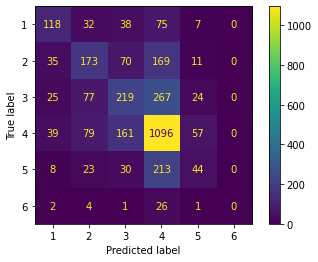

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

X_test_tf = tfidf.transform(X_test)
y_pred = model.predict(X_test_tf)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, X_test_tf, y_test)
classification_report(y_test, y_pred)

In [105]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_tf, y_train)

RandomForestClassifier()

0.5262483994878361
[[  68   34   17  148    3    0]
 [  13  107   32  305    1    0]
 [  12   22  139  432    7    0]
 [  19   27   56 1314   16    0]
 [   3    8    7  285   15    0]
 [   0    1    1   30    1    1]]


F:\buythedip\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


'              precision    recall  f1-score   support\n\n           1       0.59      0.25      0.35       270\n           2       0.54      0.23      0.33       458\n           3       0.55      0.23      0.32       612\n           4       0.52      0.92      0.67      1432\n           5       0.35      0.05      0.08       318\n           6       1.00      0.03      0.06        34\n\n    accuracy                           0.53      3124\n   macro avg       0.59      0.28      0.30      3124\nweighted avg       0.52      0.53      0.46      3124\n'

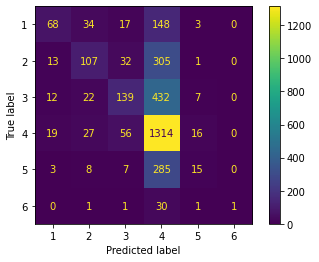

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

X_test_tf = tfidf.transform(X_test)
y_pred = model.predict(X_test_tf)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, X_test_tf, y_test)
classification_report(y_test, y_pred)